# CASTEP Al Slab benchmark performance

This notebook compares the performance of the small Al Slab (al3x3) benchmark across different HPC facilities. The general comparison is followed by more detailed analysis on the ARCHER2 comparing

- performance as a funtion of different Slurm binding schemes
- performance as a function of the value of the CASTEP input parameter: `num_proc_in_smp`
- performance as a function of different numerical libraries on the ARCHER2 system.

Performance is given in SCF cycles per second. The time per SCF cycle is computed as the mean time per SCF cycle from all cycles in the CASTEP output file, with the fastest and slowest cycle times discarded.

Different versions of CASTEP may have been used on different facilities - the latest version was used at the time that the benchmarks were run.

## Setup section

Import the required modules and define useful functions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,6)
import seaborn as sns
sns.set(font_scale=1.5, context="paper", style="white", font="serif")
pal = sns.color_palette()
cols = pal.as_hex()

In [2]:
import sys
sys.path.append('../../../python-modules')

In [3]:
from utilities import filemanip, sysinfo
from appanalysis import castep

In [4]:
sysdetails = sysinfo.getdetails('../../../systems.yaml')

## Process data

In [7]:
results = ['ARCHER',
           'ARCHER2-4c_MKL-19.5',
           'ARCHER2-4c_LibSci-20.10',
           'ARCHER2_CCE-12.0.3_LibSci-21.08.1.2',
           'Athena',
           'Cirrus',
           'Thomas',
           'Tesseract',
           'CSD3-Skylake',
           'EPCC-CascadeLake']
# Mapping of results subdirectories to system definitions 
systems = {
    'ARCHER': 'ARCHER',
    'ARCHER2-4c_MKL-19.5': 'ARCHER2', 
    'ARCHER2-4c_LibSci-20.10': 'ARCHER2', 
    'ARCHER2_CCE-12.0.3_LibSci-21.08.1.2': 'ARCHER2', 
    'Athena': 'Athena',
    'Cirrus': 'Cirrus',
    'Thomas': 'Thomas',
    'Tesseract': 'Tesseract',
    'CSD3-Skylake': 'CSD3-Skylake',
    'EPCC-CascadeLake': 'EPCC-CascadeLake'
}
perf = {}
notes = {}
names = {}
nodes = {}
cores = {}
perf_nodes = {}
perf_cores = {}
cpn = {}
castep_df = {}

for res in results:
    wdir = '../al3x3/results/' + res
    filelist = filemanip.get_filelist(wdir, 'al3x3_')
    sysdict = sysdetails[systems[res]]
    names[res] = res
    cpn[res] = sysdict['PCores']*sysdict['PPerNode']
    print('\n============================================================')
    print(res)
    castep_df[res] = pd.DataFrame(castep.create_df_list(filelist, sysdict['PCores']*sysdict['PPerNode']))
    nodes[res], perf_nodes[res] = castep.get_perf_stats(castep_df[res], 'max', writestats=True, plot_cores=False)
    cores[res], perf_cores[res] = castep.get_perf_stats(castep_df[res], 'max', writestats=False, plot_cores=True)
    print('\n============================================================')


ARCHER
                             Perf                                  Tcalc  \
                              min    median       max      mean      min   
Nodes Processes Threads                                                    
1     24        1        0.005409  0.005429  0.005519  0.005453  2365.33   
2     48        1        0.011341  0.011341  0.011341  0.011341      NaN   
4     96        1        0.019480  0.019480  0.019480  0.019480   771.63   
8     192       1        0.030145  0.030145  0.030145  0.030145   567.87   
16    384       1        0.034719  0.034719  0.034719  0.034719   447.44   

                                                    Count  
                          median      max      mean   sum  
Nodes Processes Threads                                    
1     24        1        2388.68  2516.43  2410.598     5  
2     48        1            NaN      NaN       NaN     1  
4     96        1         771.63   771.63   771.630     1  
8     192       1      

/home/jovyan/work/apps/CASTEP/analysis/../../../python-modules/appanalysis/castep.py:126: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_num = df.drop(['File', 'Date'], 1)
/home/jovyan/work/apps/CASTEP/analysis/../../../python-modules/appanalysis/castep.py:126: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_num = df.drop(['File', 'Date'], 1)
/home/jovyan/work/apps/CASTEP/analysis/../../../python-modules/appanalysis/castep.py:126: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_num = df.drop(['File', 'Date'], 1)
/home/jovyan/work/apps/CASTEP/analysis/../../../python-modules/appanalysis/castep.py:126: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keywor

                             Perf                                 Tcalc  \
                              min    median       max      mean     min   
Nodes Processes Threads                                                   
1     32        1        0.018863  0.018863  0.018863  0.018863  636.39   
      64        1        0.025695  0.025717  0.025740  0.025717  468.05   
      128       1        0.011632  0.035684  0.037764  0.030602  324.15   
2     128       1        0.046240  0.046240  0.046240  0.046240  265.80   
      256       1        0.019930  0.053029  0.064087  0.046586  194.82   
4     128       1        0.062170  0.065729  0.069288  0.065729  178.00   
      256       1        0.069007  0.070485  0.078201  0.072564  156.36   
                2        0.067448  0.067448  0.067448  0.067448  184.40   
      512       1        0.032072  0.055467  0.094206  0.061148  132.14   
8     256       1        0.094776  0.097108  0.099441  0.097108  125.01   
      512       1        

/home/jovyan/work/apps/CASTEP/analysis/../../../python-modules/appanalysis/castep.py:126: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_num = df.drop(['File', 'Date'], 1)
/home/jovyan/work/apps/CASTEP/analysis/../../../python-modules/appanalysis/castep.py:126: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_num = df.drop(['File', 'Date'], 1)
/home/jovyan/work/apps/CASTEP/analysis/../../../python-modules/appanalysis/castep.py:126: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_num = df.drop(['File', 'Date'], 1)
/home/jovyan/work/apps/CASTEP/analysis/../../../python-modules/appanalysis/castep.py:126: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keywor

                             Perf                                  Tcalc  \
                              min    median       max      mean      min   
Nodes Processes Threads                                                    
1     28        1        0.009842  0.009918  0.009946  0.009904  1190.63   
2     56        1        0.020530  0.020530  0.020530  0.020530   595.49   
4     112       1        0.024945  0.032045  0.039145  0.032045   307.43   
8     224       1        0.065784  0.065784  0.065784  0.065784   211.12   
16    448       1        0.053135  0.061107  0.069079  0.061107   172.15   

                                                     Count  
                           median      max      mean   sum  
Nodes Processes Threads                                     
1     28        1        1198.315  1529.65  1252.400     6  
2     56        1         595.490   595.49   595.490     1  
4     112       1         401.580   495.73   401.580     2  
8     224       1        

/home/jovyan/work/apps/CASTEP/analysis/../../../python-modules/appanalysis/castep.py:126: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_num = df.drop(['File', 'Date'], 1)
/home/jovyan/work/apps/CASTEP/analysis/../../../python-modules/appanalysis/castep.py:126: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_num = df.drop(['File', 'Date'], 1)
/home/jovyan/work/apps/CASTEP/analysis/../../../python-modules/appanalysis/castep.py:126: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_num = df.drop(['File', 'Date'], 1)
/home/jovyan/work/apps/CASTEP/analysis/../../../python-modules/appanalysis/castep.py:126: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keywor

                             Perf                                  Tcalc  \
                              min    median       max      mean      min   
Nodes Processes Threads                                                    
1     24        1        0.008109  0.009431  0.009459  0.009216  1246.78   
2     48        1        0.018912  0.018912  0.018912  0.018912   624.90   
4     96        1        0.033382  0.033382  0.033382  0.033382   355.58   
8     192       1        0.053430  0.053430  0.053430  0.053430   222.71   
16    384       1        0.057745  0.057745  0.057745  0.057745   202.24   

                                                        Count  
                           median      max         mean   sum  
Nodes Processes Threads                                        
1     24        1        1274.155  1447.95  1303.888333     6  
2     48        1         624.900   624.90   624.900000     1  
4     96        1         355.580   355.58   355.580000     1  
8     1

/home/jovyan/work/apps/CASTEP/analysis/../../../python-modules/appanalysis/castep.py:126: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_num = df.drop(['File', 'Date'], 1)
/home/jovyan/work/apps/CASTEP/analysis/../../../python-modules/appanalysis/castep.py:126: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_num = df.drop(['File', 'Date'], 1)
/home/jovyan/work/apps/CASTEP/analysis/../../../python-modules/appanalysis/castep.py:126: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_num = df.drop(['File', 'Date'], 1)
/home/jovyan/work/apps/CASTEP/analysis/../../../python-modules/appanalysis/castep.py:126: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keywor

## Performance Comparison

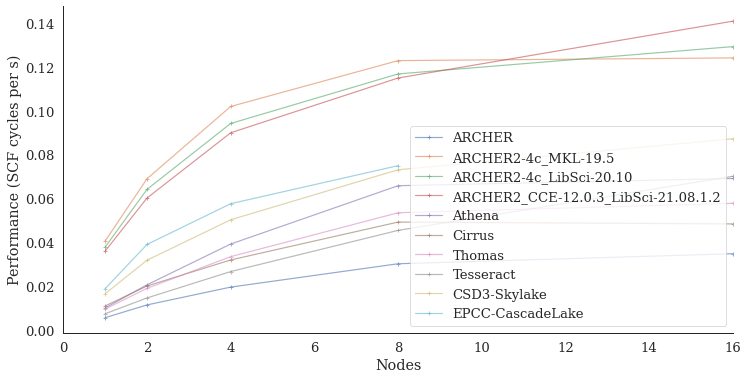

In [8]:
for res in results:
    plt.plot(nodes[res], perf_nodes[res], '-+', label=names[res], alpha=0.6)
plt.xlim((0,16))
plt.xlabel('Nodes')
plt.ylabel('Performance (SCF cycles per s)')
plt.legend(loc='best')
sns.despine()

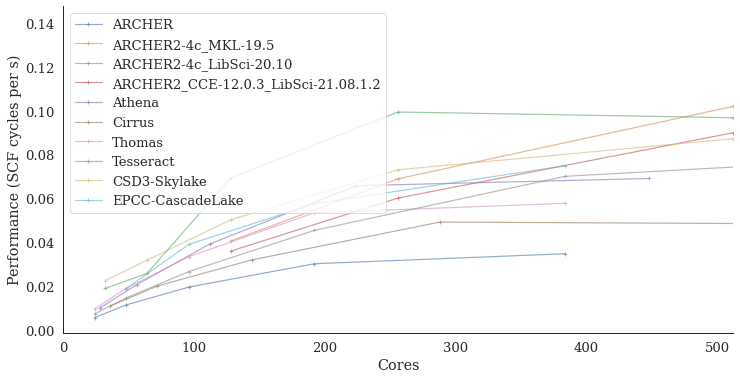

In [9]:
for res in results:
    plt.plot(cores[res], perf_cores[res], '-+', label=names[res], alpha=0.6)
plt.xlim((0,512))
plt.xlabel('Cores')
plt.ylabel('Performance (SCF cycles per s)')
plt.legend(loc='best')
sns.despine()

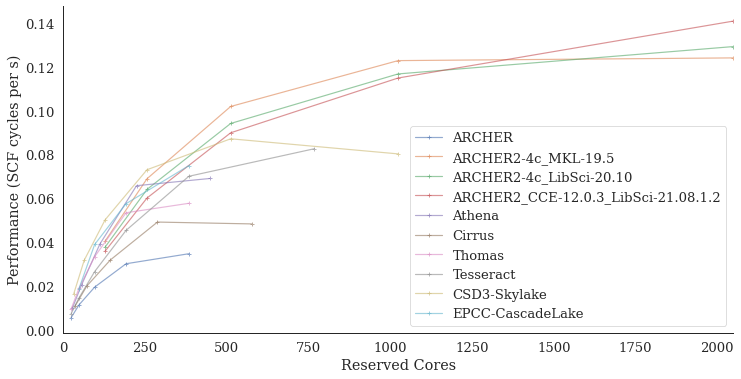

In [11]:
perf_totcores = {}
for res in results:
    totcores = [n * cpn[res] for n in nodes[res]]
    plt.plot(totcores, perf_nodes[res], '-+', label=names[res], alpha=0.6)
plt.xlim((0,2048))
plt.xlabel('Reserved Cores')
plt.ylabel('Performance (SCF cycles per s)')
plt.legend(loc='best')
sns.despine()

## ARCHER2: Performance of binding options and shared memory segments

This section looks at the ARCHER2 performance (with the HPE Cray LibSci 20.10 numerical library) with respect to two different Slurm binding options: `cores` and `rank` and the choice of different values for the CASTEP `num_proc_in_smp` option which uses shared memory segments. The tables have the following columns:

 - Nodes: number of nodes
 - Perf.: the performance of CASTEP in SCF cycles/s
 - Perfect: perfect speedup relative to single node performance
 - Speedup: measured speedup relative to single node performance
 - Eff.: parallel efficiency

Binding = cores, nSMP = 1
     Nodes     Perf.   Perfect   Speedup      Eff.
         1   0.03776      1.00      1.00    100.00
         2   0.05780      2.00      1.53     76.53
         4   0.04469      4.00      1.18     29.58
         8   0.02373      8.00      0.63      7.86
        16   0.01919     16.00      0.51      3.18
Binding = cores, nSMP = 2
     Nodes     Perf.   Perfect   Speedup      Eff.
         1   0.03108      1.00      1.00    100.00
         2   0.04657      2.00      1.50     74.91
         4   0.06483      4.00      2.09     52.14
         8   0.05379      8.00      1.73     21.63
        16   0.04948     16.00      1.59      9.95
Binding = cores, nSMP = 4
     Nodes     Perf.   Perfect   Speedup      Eff.
         1   0.01981      1.00      1.00    100.00
         2   0.03734      2.00      1.88     94.24
         4   0.05547      4.00      2.80     69.99
         8   0.07534      8.00      3.80     47.53
        16   0.07570     16.00      3.82     23.88
Bind

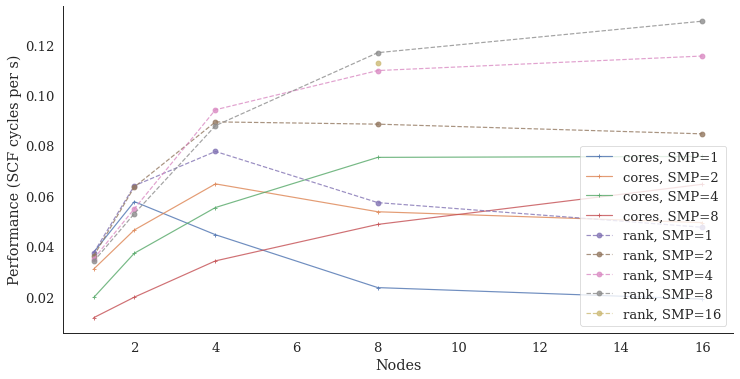

In [9]:
pins = ['cores','rank']
style = {}
style['cores'] = '-+'
style['rank'] = '--o'
for pin in pins:
    df = castep_df['ARCHER2_LibSci-20.10'].query(f'(Pinning == "{pin}")')
    smps = df.nSMP.unique()
    for smp in smps:
        df_temp = df.query(f'(nSMP == {smp})')
        df_temp = df_temp.drop(['File', 'Date','Pinning'], 1)
        groupf = {'Perf':['min','median','max','mean'], 'Tcalc':['min','median','max','mean'], 'Count':'sum'}
        df_group = df_group = df_temp.sort_values(by='Nodes').groupby(['Nodes']).agg(groupf)
        perf = df_group['Perf','max'].tolist()
        count = df_group.index.get_level_values(0).tolist()
        plt.plot(count, perf, style[pin], label=f'{pin}, SMP={smp}', alpha=0.8)
        print(f'Binding = {pin}, nSMP = {smp}')
        print(f'{"Nodes":>10s}{"Perf.":>10s}{"Perfect":>10s}{"Speedup":>10s}{"Eff.":>10s}')
        for i, p in enumerate(perf):
            speedup = p / perf[0]
            perfect = count[i]/count[0]
            eff = 100 * speedup/perfect
            print(f'{count[i]:>10d}{p:>10.5f}{perfect:>10.2f}{speedup:>10.2f}{eff:>10.2f}')
        
plt.xlabel('Nodes')
plt.ylabel('Performance (SCF cycles per s)')
plt.legend(loc='lower right')
sns.despine()

## ARCHER2: Comparison of different numerical libraries

This section compares the performance of this CASTEP benchmark for CASTEP compiled with various numerical libraries. Apart from the numerical libraries themselves all versions of CASTEP were compiled with GCC 10.1.0, FFTW 3.3.8.8 and HPE Cray MPICH 8.0.16.

In [10]:
results = ['ARCHER2_LibSci-20.10','ARCHER2_MKL-19.5','ARCHER2_MKL-21.2','ARCHER2_AOCL-3.0']
systems = {
    'ARCHER2_LibSci-20.10': 'ARCHER2',
    'ARCHER2_MKL-19.5': 'ARCHER2',
    'ARCHER2_MKL-21.2': 'ARCHER2',
    'ARCHER2_AOCL-3.0': 'ARCHER2'
}
perf = {}
notes = {}
names = {}
nodes = {}
cores = {}
perf_nodes = {}
perf_cores = {}
cpn = {}

for res in results:
    wdir = '../al3x3/results/' + res
    filelist = filemanip.get_filelist(wdir, 'al3x3_')
    sysdict = sysdetails[systems[res]]
    names[res] = res
    cpn[res] = sysdict['PCores']*sysdict['PPerNode']
    print('\n============================================================')
    print(res)
    castep_df[res] = pd.DataFrame(castep.create_df_list(filelist, sysdict['PCores']*sysdict['PPerNode']))
    nodes[res], perf_nodes[res] = castep.get_perf_stats(castep_df[res], 'max', writestats=True, plot_cores=False)
    cores[res], perf_cores[res] = castep.get_perf_stats(castep_df[res], 'max', writestats=False, plot_cores=True)
    print('\n============================================================')


ARCHER2_LibSci-20.10
                             Perf                                 Tcalc  \
                              min    median       max      mean     min   
Nodes Processes Threads                                                   
1     32        1        0.018863  0.018863  0.018863  0.018863  636.39   
      64        1        0.025695  0.025717  0.025740  0.025717  468.05   
      128       1        0.011632  0.035684  0.037764  0.030602  324.15   
2     128       1        0.046240  0.046240  0.046240  0.046240  265.80   
      256       1        0.019930  0.053029  0.064087  0.046586  194.82   
4     128       1        0.062170  0.065729  0.069288  0.065729  178.00   
      256       1        0.069007  0.070485  0.078201  0.072564  156.36   
                2        0.067448  0.067448  0.067448  0.067448  184.40   
      512       1        0.032072  0.055467  0.094206  0.061148  132.14   
8     256       1        0.094776  0.097108  0.099441  0.097108  125.01   
   

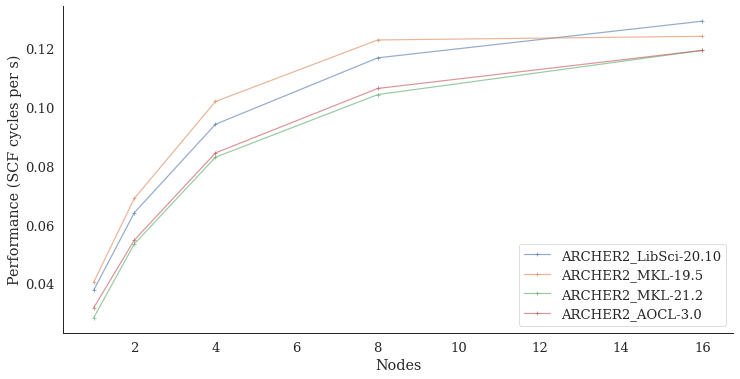

In [11]:
for res in results:
    plt.plot(nodes[res], perf_nodes[res], '-+', label=names[res], alpha=0.6)
plt.xlabel('Nodes')
plt.ylabel('Performance (SCF cycles per s)')
plt.legend(loc='best')
sns.despine()
plt.savefig('castep_al3x3_blaslib_perf.png', dpi=300)

Performance relative to performance of HPE Cray LibSci 20.10 version of CASTEP at 1 node and 8 nodes.

In [12]:
base_perf = perf_nodes['ARCHER2_LibSci-20.10'][0]
print("1 node:")
print(f"{'Version':>20s} {'Perf.':>10s} {'Ratio':>10s}")
for res in results:
    perf = perf_nodes[res][0]
    print(f"{res:>20s} {perf:>10.5f} {perf/base_perf:>10.5f}")

print("4 nodes:")
print(f"{'Version':>20s} {'Perf.':>10s} {'Ratio':>10s}")
base_perf = perf_nodes['ARCHER2_LibSci-20.10'][2]
for res in results:
    perf = perf_nodes[res][2]
    print(f"{res:>20s} {perf:>10.5f} {perf/base_perf:>10.5f}")


1 node:
             Version      Perf.      Ratio
ARCHER2_LibSci-20.10    0.03776    1.00000
    ARCHER2_MKL-19.5    0.04050    1.07239
    ARCHER2_MKL-21.2    0.02838    0.75155
    ARCHER2_AOCL-3.0    0.03177    0.84134
4 nodes:
             Version      Perf.      Ratio
ARCHER2_LibSci-20.10    0.09421    1.00000
    ARCHER2_MKL-19.5    0.10196    1.08233
    ARCHER2_MKL-21.2    0.08300    0.88100
    ARCHER2_AOCL-3.0    0.08445    0.89644
